# <font color=navy> Lecture 3. 표본분포 </font>


## Example: 대학 입학원서
- K대학교 경영대학은 매년 예비 대학생들로부터  900건의 입학원서를 받고 있다. 
     지원서에는 해당 학생의 수능 성적과 기숙사 생활
     희망여부를 담고 있다. 입학사정관은 다음과 같은 정보를 알고 싶어 한다
    - 900명의 응시자의 
    수능 평균성적
    - 기숙사에 살고 싶어 하는
    학생의 비율

| 일련번호 |  이름 | 수능성적 | 기숙사 희망여부  |
|:--------:|:-----:|:--------:|:----------------:|
|     1    | 정여* |    320   |         Y        |
|     2    | 최병* |    374   |         N        |
|     3    | 조윤* |    318   |         N        |
|     4    | 권순* |    356   |         Y        |
|     5    | 안성* |    331   |         Y        |
|     $\vdots$   |    $\vdots$   |     $\vdots$     |        $\vdots$          |

#### 900명에 대한 전수조사가 가능하다면? 
- 모집단의 수능성적 평균
$$ \mu=\frac{\sum_i x_i }{900} = 342$$

- 모집단의 수능성적에 대한 표준편차
$$ \sigma=\sqrt{\frac{\sum_i (x_i-\mu)^2}{900}}=30$$

- 모집단의 기숙사 생활 희망 학생의 비중
$$ p=\frac{320}{900}\approx0.36$$

#### 시간관계로 900명 전부를 조사하지 못한다면? 
- 무작위 표본 추출: n=30명
- 표본으로 계산한 값으로 모수를 추정

- 점추정
    - $\bar x$는 $\mu$의 점추정량
    $$\bar x=\frac{\sum x_i}{30}=350$$

    - $s$는 $\sigma$의 점추정량
    $$ s=\sqrt{\frac{\sum (x_i-\bar x)^2 }{29}} = 28$$

    - $\hat p$는 $p$의 점추정량
    $$ \hat p = \frac{10}{30} \approx0.33 $$

-  다른 표본을 선택하면 점추정값이 다를 수 있다.

## 3.1 $\bar X$의 표본분포
-  표본평균 $\bar X$ 의 <font color="blue">모든 가능한</font> 값의 확률 분포 
- 900명의 지원자중 30명을 무작위로 뽑는 행위를 여러 번 (예를 들면, 1000번) 반복한다면?

|      표본      | 수능성적 평균 ($\bar x$) |   
|:--------------:|:-------------:|
|  1,9,34,…, 823 |      350      |   
| 3,54,77,…, 789 |      332      |   
|  7,12,48,…,892 |      361      |   
| $\vdots$ | $\vdots$|

#### 실험
- 만일 900명 지원자의 수능점수 분포가 정규분포라면, 1000개의 $\bar x$는 어떤 분포를 가지는가? 

In [1]:
# import common
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
n=30
rep=1000
np.random.seed(seed=0)
xsample = stats.norm.rvs(size=n*rep, loc=342, scale=30)
xsample = np.reshape(xsample, [n,rep])
sample_mean = xsample.mean(axis=0)

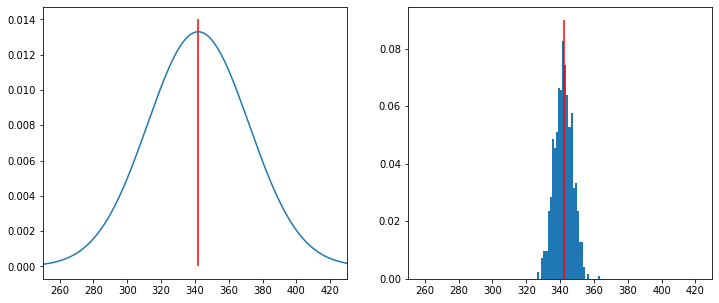

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes[0]
x = np.linspace(250, 430, 300)
ax.plot(x, stats.norm.pdf(x, loc=342, scale=30))
ax.vlines(342,0,0.014,color='red')
ax.set_xlim(250, 430)


ax = axes[1]
ax.hist(sample_mean, bins=30, density=True)
ax.set_xlim(250, 430)
ax.vlines(342,0,0.09,color='red')
plt.show()

### $\bar X$ 의 표본분포 
- 평균
    $$ E(\bar X)=\mu $$
    - $\bar X$는 $\mu$의 _불편추정량(unbiased estimator)_
    
- 표준편차($\bar X$의 표준오차, standard error)
$$ \sigma_{\bar X}= \frac{\sigma} {\sqrt n} $$

- 수능성적의 평균의 표본분포 
    - $\bar X$ 의 기대값 $= 342$
    - $\bar X$의 표준편차(표준오차)$= \frac {30}{\sqrt{30}}\approx5.5$
    
    

###  중심극한정리 (Central limit theorem; CLT)
- 규모가 큰 $(n \geq 30)$ 단순 무작위 표본을 사용한다면 <font color="blue">모분포가 정규분포가 아니더라도</font> 표본평균의 분포는 <font color="blue">정규분포에  근사한다.</font>


In [5]:
n=30
rep=1000
np.random.seed(seed=0)
xsample = stats.expon.rvs(size=n*rep)
xsample = np.reshape(xsample, [n,rep])
sample_mean = xsample.mean(axis=0)

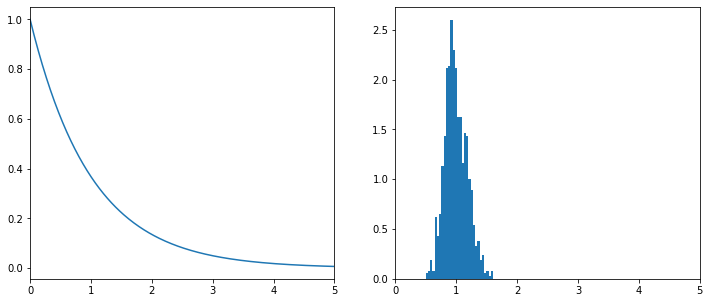

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes[0]
x = np.linspace(0, 5, 300)
ax.plot(x, stats.expon.pdf(x))
ax.set_xlim(0, 5)
ax = axes[1]
ax.hist(sample_mean, bins=30, density=True)
ax.set_xlim(0, 5)
ax.set_position
plt.show()

#### 수능성적에 대한    $\bar X$ 의 표본분포
- 30명의 무작위 추출 표본에 대한 평균이 실제 모집단 평균의 +/-  10 안에 있을 확률은 얼마인가?
 다시 말해서,   $\bar X$가 332에서 352 사이에 있을 확률은
얼마인가?

In [8]:
mu = 342
se = 30/np.sqrt(30)
stats.norm.cdf(352, loc=mu, scale=se) - stats.norm.cdf(332, loc=mu, scale=se) 

0.932110845138171

### 표본규모와 $\bar X$의 표본분포와의 관계
- 30명이 아닌 100명의 단순 무작위 표본 추출을 한다면 표본분포는 어떻게 달라지는가?
    - $\bar X$의 평균 $E(\bar X)=$<br><br>

    - $\bar x$의 표준오차 $\sigma_{\bar X}=$<br><br>

- n이 커지면 $\bar x$의 표준오차가 작아진다. <font color="blue"> $\Rightarrow$ 더 정확한 추정치 계산 가능! </font>


## 3.2 $\hat p$의 표본분포

- $\hat p$의 표본분포는 표본비율의  모든 가능한 값의 
   확률분포
   
|      표본      | 기숙사 희망비율 ($\hat p$) |   
|:--------------:|:-------------:|
|  1,9,34,…, 823 |      0.33      |   
| 3,54,77,…, 789 |      0.28      |   
|  7,12,48,…,892 |      0.35      |   
| $\vdots$ | $\vdots$|


- 30개의 표본을 1000번 반복추출하여 계산한 $\hat p$의 분포는 어떤 형태인가?
    - X: 30명 중 기숙사를 희망하는 학생 수
    - p: 기숙사 희망학생의  모집단 비율 = 0.36
        $$X \sim Bin(30, 0.36 ) $$
        $$\hat p = \frac X {30}$$


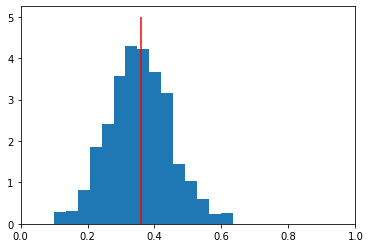

In [10]:
n=30
rep=1000
np.random.seed(seed=0)
xsample = stats.binom.rvs(1, 0.36, size=n*rep)
xsample = np.reshape(xsample, [n,rep])
sample_p = xsample.sum(axis=0)/30

plt.hist(sample_p, bins=15, density=True)
plt.xlim(0, 1)
plt.vlines(0.36,0,5,color='red')
plt.show()

### $\hat p$의 표본분포
- $\hat p$의 기대값 
$$E(\hat p)=p$$
  
- $\hat p$의 표준편차(표준오차)  
$$  \sigma_{\hat p} = \sqrt{\frac {p(1-p)}{n}} $$

    - 위의 기대값과 표준편차는 어떻게 나온 것인가?
        - recall: $ X \sim Bin(n,p) $
    $$ E(X) = np$$
    $$ Var(X) = np(1-p)$$ 
        

 
### $\hat p$의 표본분포의 형태
- $\hat p$의 표본분포는 표본의 규모가 커질수록 정규분포에 근사한다.
- 조건: $np \geq 5 ~\& ~n(1 – p) \geq 5$
    - 모집단 비율이 0.5에 가깝다면, 표본 규모가 10 정도로 작다고  하더라도 정규분포를 이용 가능
    - 모집단 비율 p가 매우 크거나(1에 가까운경우) 또는 매우 작을 경우(0에 가까운 경우)에는
    매우 큰 표본이 필요

#### 기숙사 지원 학생 비율의 표본분포 
- 앞의 예에서 지원자의 36%의 학생이 기숙사 생활을 희망하는 것으로 조사 되었다.
30명의 단순 무작위 추출표본으로부터 (기숙사 생활을 희망하는) 모집단 비율 추정치가 실제 모집단 비율의  +/- . 05 이내에  있을 확률은 얼마인가?
 
$$ \hat p \approx N\left( 0.36, \sqrt{\frac{0.36(1-0.36)}{30}} \right)$$


In [11]:
p = 0.36
p_se = np.sqrt(0.36*(1-0.36)/30)
stats.norm.cdf(0.41, loc = p, scale = p_se) - stats.norm.cdf(0.31, loc = p, scale = p_se)

0.4316914361938051